<a href="https://colab.research.google.com/github/FeerOT/RiesgoRelativo/blob/main/Proyecto_3_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-cloud-bigquery
!pip install pandas
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()
# Especifica el ID del proyecto
project_id = 'riesgo-relativo-406716'
client = bigquery.Client(project=project_id)
# Especifica la consulta SQL para obtener los datos
query = 'SELECT * FROM `riesgo-relativo-406716.Pruebas.Tabla_General`'
# Ejecuta la consulta y almacena los resultados en un DataFrame de Pandas
df = client.query(query).to_dataframe()
# Imprime el DataFrame
print(df.head())

   user_id  age sex  last_month_salary_limpio  number_dependents_limpio  \
0       17   79   M                   10500.0                         0   
1      353   59   F                    4200.0                         0   
2      404   56   F                    6700.0                         1   
3      405   69   M                    5200.0                         0   
4      485   74   M                   15916.0                         0   

   default_flag  using_lines_not_secured_personal_assets_limpio  \
0             0                                        0.142582   
1             0                                        0.118795   
2             0                                        0.058924   
3             0                                        0.173502   
4             0                                        0.286345   

   more_90_days_overdue  number_times_delayed_payment_loan_30_59_days  \
0                     0                                             0   


In [ ]:
df.describe()

,user_id,age,last_month_salary_limpio,number_dependents_limpio,default_flag,using_lines_not_secured_personal_assets_limpio,more_90_days_overdue,number_times_delayed_payment_loan_30_59_days,debt_ratio_limpio,loan_real_state,loan_other,total_loans,cuartil_age,cuartil_debt_ratio,cuartil_more_90_days,cuartil_delayed_payment,cuartil_secured_lines,cuartil_total_loans,cuartil_last_month_salary,cuartil_number_dependet
count,35755.0,35755.0,35755.000000,35755.0,35755.0,35755.000000,35755.0,35755.0,35755.000000,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0,35755.0
mean,18004.10681,52.248497,6349.047518,0.742246,0.017676,0.315480,0.08975,0.249112,0.467931,1.021535,7.490673,8.512208,2.499958,2.499958,2.499958,2.499958,2.499958,2.499958,2.499958,2.499958
std,10394.598969,14.540253,8253.267882,1.112517,0.131772,0.346474,0.50007,0.702049,0.354664,1.119146,4.796816,5.175203,1.118037,1.118037,1.118037,1.118037,1.118037,1.118037,1.118037,1.118037
min,1.0,21.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,9004.5,41.0,3910.500000,0.0,0.0,0.030072,0.0,0.0,0.178187,0.0,4.0,5.0,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5
50%,18005.0,52.0,5200.000000,0.0,0.0,0.150628,0.0,0.0,0.366782,1.0,7.0,8.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
75%,27009.5,63.0,7451.000000,1.0,0.0,0.547680,0.0,0.0,0.870415,2.0,10.0,11.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
max,36000.0,89.0,730483.000000,13.0,1.0,1.000000,15.0,11.0,1.000000,25.0,56.0,57.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


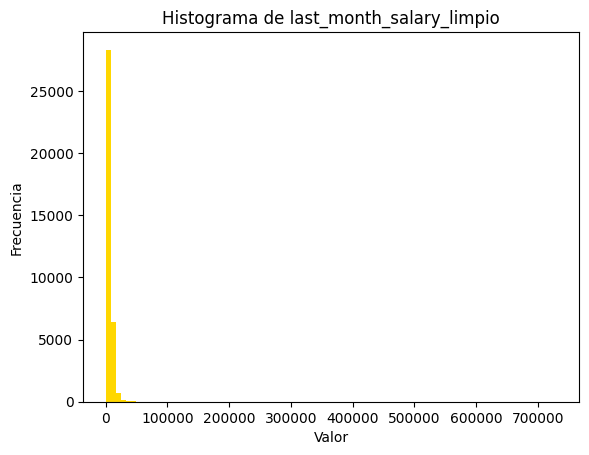

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd
# Autenticación con Google Cloud
auth.authenticate_user()
project_id = 'riesgo-relativo-406716'
# Conexión con BigQuery
client = bigquery.Client(project=project_id)
# Consulta SQL
query = '''
SELECT last_month_salary_limpio,
FROM `riesgo-relativo-406716.Pruebas.Tabla_General`
'''
# Ejecutar la consulta
query_job = client.query(query)
# Obtener los resultados de la consulta en un DataFrame de Pandas
result = query_job.result().to_dataframe()
# Creación de histograma
plt.hist(result['last_month_salary_limpio'], bins=90, color='gold', alpha=1)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de last_month_salary_limpio')
# Visualización del histograma
plt.show()

In [ ]:
# Supongamos que ya tienes tu DataFrame df con la variable last_month_salary
# Si la columna tiene valores nulos, puedes usar dropna() para eliminarlos
columna_last_month_salary = df['last_month_salary_limpio'].dropna()
# Identificación de outliers
Q1 = columna_last_month_salary.quantile(0.25)
Q3 = columna_last_month_salary.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filtrar los outliers
columna_last_month_salary_sin_outliers = columna_last_month_salary[
    (columna_last_month_salary >= limite_inferior) & (columna_last_month_salary <= limite_superior)
]
# Calcular la media sin outliers
media_sin_outliers = columna_last_month_salary_sin_outliers.mean()
print(f"Media de last_month_salary_limpio sin outliers: {media_sin_outliers}")

Media de last_month_salary_limpio sin outliers: 5413.743282249665


In [ ]:
# Supongamos que ya tienes tu DataFrame df con la variable last_month_salary
# Si la columna tiene valores nulos, puedes usar dropna() para eliminarlos
columna_last_month_salary = df['last_month_salary_limpio'].dropna()
# Identificación de outliers
Q1 = columna_last_month_salary.quantile(0.25)
Q3 = columna_last_month_salary.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Filtrar los outliers
columna_last_month_salary_sin_outliers = columna_last_month_salary[
    (columna_last_month_salary >= limite_inferior) & (columna_last_month_salary <= limite_superior)
]
# Calcular la mediana sin outliers
mediana_sin_outliers = columna_last_month_salary_sin_outliers.median()
print(f"Mediana de last_month_salary sin outliers: {mediana_sin_outliers}")

Mediana de last_month_salary sin outliers: 5200.0


In [ ]:
import pandas as pd
from scipy.stats import shapiro
from google.colab import auth
# Autenticación con BigQuery (puede que necesites autenticarte si aún no lo has hecho)
auth.authenticate_user()
# Especifica tu proyecto y configuración de BigQuery
project_id = "riesgo-relativo-406716"
query = "SELECT * FROM `riesgo-relativo-406716.Pruebas.Tabla_General`"  # Reemplaza con tu propia consulta SQL
# Lee los datos desde BigQuery a un DataFrame de pandas
df = pd.read_gbq(query, project_id=project_id, dialect="standard")
# Selecciona la columna de interés para aplicar el test de Shapiro
columna_interes = 'last_month_salary_limpio'
datos = df[columna_interes].dropna()  # Asegúrate de manejar los valores nulos adecuadamente
# Aplica el test de Shapiro
estadistico_shapiro, p_valor = shapiro(datos)
# Imprime los resultados
print(f'Estadístico de Shapiro: {estadistico_shapiro}')
print(f'P-valor: {p_valor}')
# Interpreta los resultados
alpha = 0.05
if p_valor > alpha:
    print('No se rechaza la hipótesis nula. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de Shapiro: 0.27466005086898804
P-valor: 0.0
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


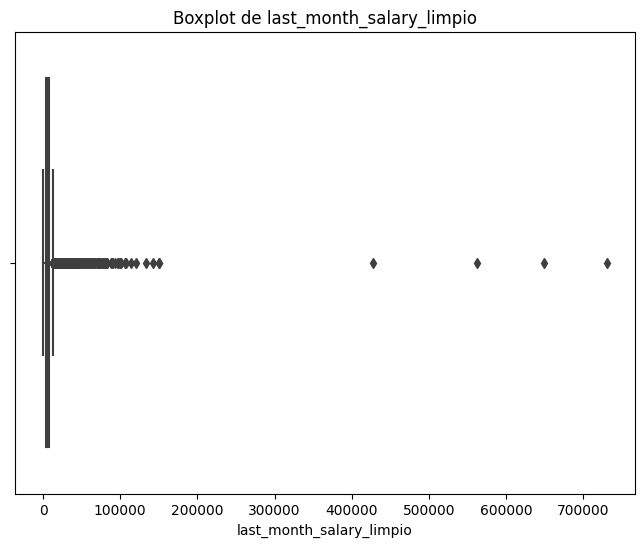

Resumen de la interpretación:
  - El boxplot muestra la dispersión y tendencia central de last_month_salary_limpio.
  - Los outliers están identificados como aquellos fuera de los límites: [-1400.25, 12761.75].
  - Se encontraron 2150 outliers en last_month_salary_limpio.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Supongamos que ya tienes tu DataFrame df con la variable last_month_salary
# Si la columna tiene valores nulos, puedes usar dropna() para eliminarlos
columna_last_month_salary = df['last_month_salary_limpio'].dropna()
# Crear un boxplot con seaborn
plt.figure(figsize=(8, 6))  # Opcional: ajustar el tamaño de la figura
sns.boxplot(x=columna_last_month_salary)
# Agregar etiquetas y título
plt.xlabel("last_month_salary_limpio")
plt.title("Boxplot de last_month_salary_limpio")
# Identificación de outliers
Q1 = columna_last_month_salary.quantile(0.25)
Q3 = columna_last_month_salary.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = columna_last_month_salary[(columna_last_month_salary < limite_inferior) | (columna_last_month_salary > limite_superior)]
# Mostrar el boxplot
plt.show()
# Interpretación
print("Resumen de la interpretación:")
print(f"  - El boxplot muestra la dispersión y tendencia central de last_month_salary_limpio.")
print(f"  - Los outliers están identificados como aquellos fuera de los límites: [{limite_inferior}, {limite_superior}].")
print(f"  - Se encontraron {len(outliers)} outliers en last_month_salary_limpio.")

In [ ]:
from google.colab import auth
import pandas as pd
from google.cloud import bigquery
# Autenticación con BigQuery
auth.authenticate_user()
project_id = "riesgo-relativo-406716"  # Reemplaza con tu ID de proyecto
# Configuración de la conexión a BigQuery
client = bigquery.Client(project=project_id)
# Consulta a BigQuery para obtener la tabla
query = """
SELECT *
FROM `riesgo-relativo-406716.Pruebas.Tabla_General`
"""
tabla_general = client.query(query).to_dataframe()
# Resto del código utilizando la variable 'tabla_general'

In [ ]:
import seaborn as sns

<ipython-input-12-31b4c72ef98d>:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = tabla_general.corr()


<bound method _AxesBase.tick_params of <Axes: >>

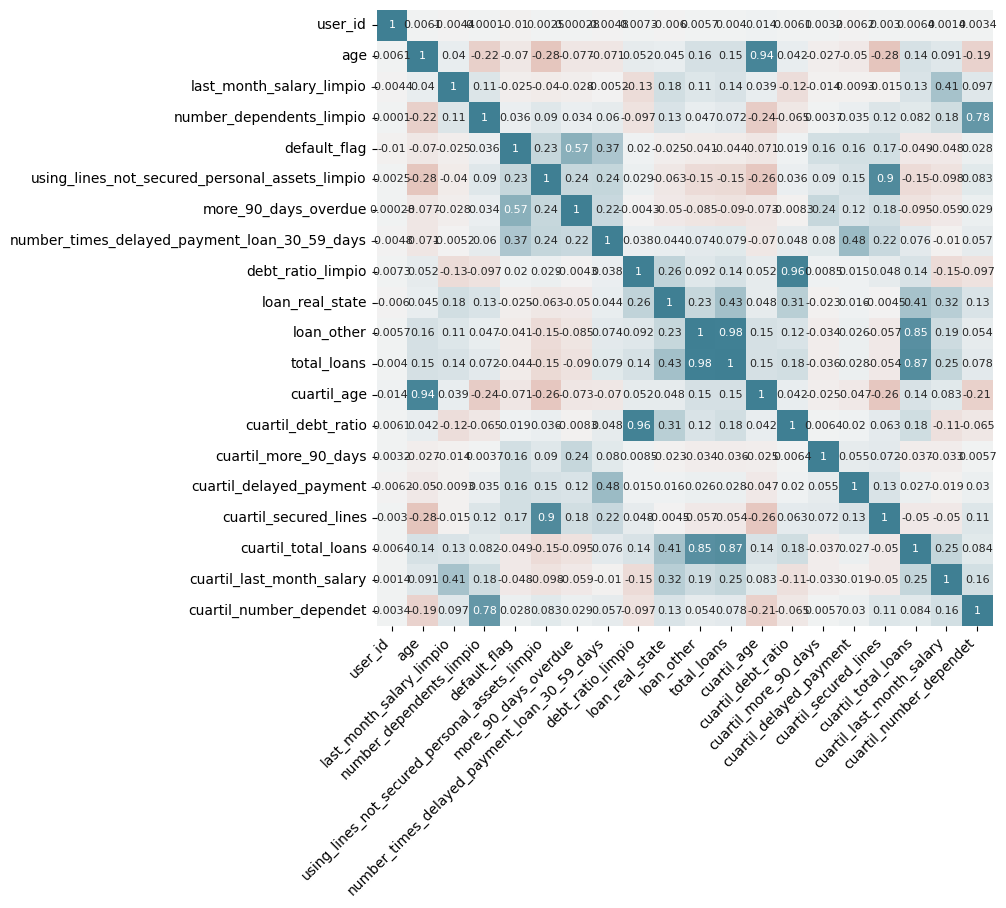

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns  # Asegúrate de importar Seaborn
from google.colab import auth
from google.cloud import bigquery
# Autenticación con BigQuery
auth.authenticate_user()
project_id = "riesgo-relativo-406716"  # Reemplaza con tu ID de proyecto
# Configuración de la conexión a BigQuery
client = bigquery.Client(project=project_id)
# Consulta a BigQuery para obtener la tabla
query = """
SELECT *
FROM `riesgo-relativo-406716.Pruebas.Tabla_General`
"""
tabla_general = client.query(query).to_dataframe()
# Calcula la matriz de correlación
corr_matrix = tabla_general.corr()
# Visualización con Seaborn
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cbar=False,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)
ax.tick_params

In [ ]:
import pandas as pd
import numpy as np
from copy import copy
# Se realiza copia de total_tabla a tabla_limpia
t_asig_quartil = copy(tabla_general)
# Calcular cuartiles directamente y asignarlos a nuevas columnas
quartiles = [1, 25, 50, 75, 99]  # Añadir 1 y 99 para el mínimo y máximo
for q in quartiles:
    col_name = f'Q{q}'
    t_asig_quartil[col_name] = np.percentile(t_asig_quartil['age'], q)
# Function to assign the quartile based on age
def assign_quartile(age):
    for i, q in enumerate(quartiles[1:-1]):  # Ignorar el mínimo y máximo en el bucle
        col_name = f'Q{q}'
        if age <= t_asig_quartil[col_name].values[0]:
            return i + 1
    return len(quartiles) - 1  # Asignar al cuartil 4 (máximo) si es mayor que el percentil 99
# Apply the function to each row in the 'Age' column
t_asig_quartil['Age Quartile'] = t_asig_quartil['age'].apply(assign_quartile)
# Display the resulting DataFrame
print(t_asig_quartil)
t_asig_quartil.info()

       user_id  age sex  last_month_salary_limpio  number_dependents_limpio  \
0           17   79   M                   10500.0                         0   
1          353   59   F                    4200.0                         0   
2          404   56   F                    6700.0                         1   
3          405   69   M                    5200.0                         0   
4          485   74   M                   15916.0                         0   
...        ...  ...  ..                       ...                       ...   
35750    23246   53   F                    5707.0                         1   
35751    19788   62   M                    8000.0                         0   
35752    24219   48   F                    8600.0                         3   
35753    10924   68   F                   10500.0                         0   
35754     2445   49   M                    5200.0                         4   

       default_flag  using_lines_not_secured_person

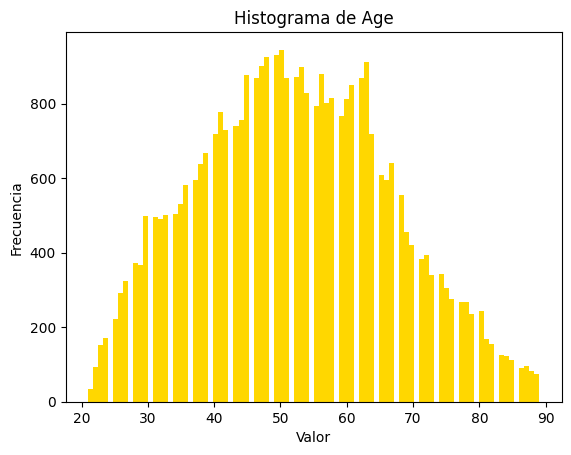

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd
# Autenticación con Google Cloud
auth.authenticate_user()
project_id = 'riesgo-relativo-406716'
# Conexión con BigQuery
client = bigquery.Client(project=project_id)
# Consulta SQL
query = '''
SELECT age,
FROM `riesgo-relativo-406716.Pruebas.Tabla_General`
'''
# Ejecutar la consulta
query_job = client.query(query)
# Obtener los resultados de la consulta en un DataFrame de Pandas
result = query_job.result().to_dataframe()
# Creación de histograma
plt.hist(result['age'], bins=90, color='gold', alpha=1)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Age')
# Visualización del histograma
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import shapiro
from google.colab import auth
# Autenticación con BigQuery (puede que necesites autenticarte si aún no lo has hecho)
auth.authenticate_user()
# Especifica tu proyecto y configuración de BigQuery
project_id = "riesgo-relativo-406716"
query = "SELECT * FROM `riesgo-relativo-406716.Pruebas.Tabla_General`"  # Reemplaza con tu propia consulta SQL
# Lee los datos desde BigQuery a un DataFrame de pandas
df = pd.read_gbq(query, project_id=project_id, dialect="standard")
# Selecciona la columna de interés para aplicar el test de Shapiro
columna_interes = 'age'
datos = df[columna_interes].dropna()  # Asegúrate de manejar los valores nulos adecuadamente
# Aplica el test de Shapiro
estadistico_shapiro, p_valor = shapiro(datos)
# Imprime los resultados
print(f'Estadístico de Shapiro: {estadistico_shapiro}')
print(f'P-valor: {p_valor}')
# Interpreta los resultados
alpha = 0.05
if p_valor > alpha:
    print('No se rechaza la hipótesis nula. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de Shapiro: 0.9900801777839661
P-valor: 9.598894480624997e-43
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


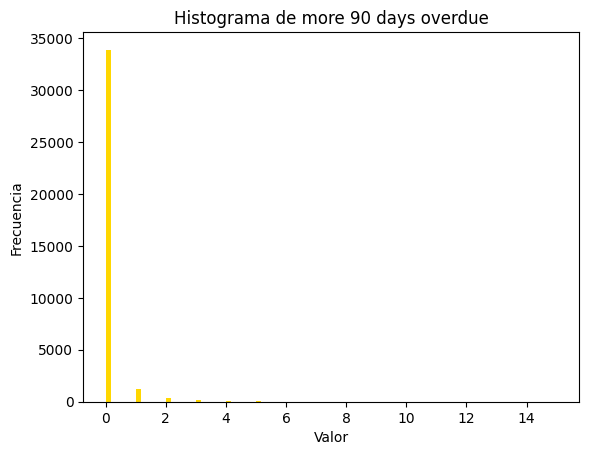

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd
# Autenticación con Google Cloud
auth.authenticate_user()
project_id = 'riesgo-relativo-406716'
# Conexión con BigQuery
client = bigquery.Client(project=project_id)
# Consulta SQL
query = '''
SELECT more_90_days_overdue,
FROM `riesgo-relativo-406716.Pruebas.Tabla_General`
'''
# Ejecutar la consulta
query_job = client.query(query)
# Obtener los resultados de la consulta en un DataFrame de Pandas
result = query_job.result().to_dataframe()
# Creación de histograma
plt.hist(result['more_90_days_overdue'], bins=90, color='gold', alpha=1)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de more 90 days overdue')
# Visualización del histograma
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import shapiro
from google.colab import auth
# Autenticación con BigQuery (puede que necesites autenticarte si aún no lo has hecho)
auth.authenticate_user()
# Especifica tu proyecto y configuración de BigQuery
project_id = "riesgo-relativo-406716"
query = "SELECT * FROM `riesgo-relativo-406716.Pruebas.Tabla_General`"  # Reemplaza con tu propia consulta SQL
# Lee los datos desde BigQuery a un DataFrame de pandas
df = pd.read_gbq(query, project_id=project_id, dialect="standard")
# Selecciona la columna de interés para aplicar el test de Shapiro
columna_interes = 'more_90_days_overdue'
datos = df[columna_interes].dropna()  # Asegúrate de manejar los valores nulos adecuadamente
# Aplica el test de Shapiro
estadistico_shapiro, p_valor = shapiro(datos)
# Imprime los resultados
print(f'Estadístico de Shapiro: {estadistico_shapiro}')
print(f'P-valor: {p_valor}')
# Interpreta los resultados
alpha = 0.05
if p_valor > alpha:
    print('No se rechaza la hipótesis nula. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de Shapiro: 0.17375928163528442
P-valor: 0.0
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


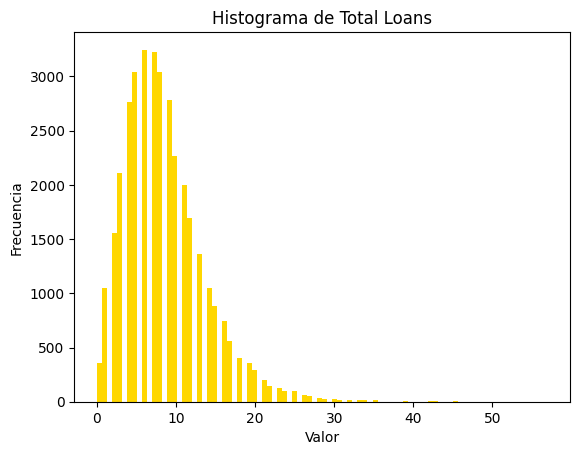

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import matplotlib.pyplot as plt
import pandas as pd
# Autenticación con Google Cloud
auth.authenticate_user()
project_id = 'riesgo-relativo-406716'
# Conexión con BigQuery
client = bigquery.Client(project=project_id)
# Consulta SQL
query = '''
SELECT total_loans,
FROM `riesgo-relativo-406716.Pruebas.Tabla_General`
'''
# Ejecutar la consulta
query_job = client.query(query)
# Obtener los resultados de la consulta en un DataFrame de Pandas
result = query_job.result().to_dataframe()
# Creación de histograma
plt.hist(result['total_loans'], bins=90, color='gold', alpha=1)
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de Total Loans')
# Visualización del histograma
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import shapiro
from google.colab import auth
# Autenticación con BigQuery (puede que necesites autenticarte si aún no lo has hecho)
auth.authenticate_user()
# Especifica tu proyecto y configuración de BigQuery
project_id = "riesgo-relativo-406716"
query = "SELECT * FROM `riesgo-relativo-406716.Pruebas.Tabla_General`"  # Reemplaza con tu propia consulta SQL
# Lee los datos desde BigQuery a un DataFrame de pandas
df = pd.read_gbq(query, project_id=project_id, dialect="standard")
# Selecciona la columna de interés para aplicar el test de Shapiro
columna_interes = 'total_loans'
datos = df[columna_interes].dropna()  # Asegúrate de manejar los valores nulos adecuadamente
# Aplica el test de Shapiro
estadistico_shapiro, p_valor = shapiro(datos)
# Imprime los resultados
print(f'Estadístico de Shapiro: {estadistico_shapiro}')
print(f'P-valor: {p_valor}')
# Interpreta los resultados
alpha = 0.05
if p_valor > alpha:
    print('No se rechaza la hipótesis nula. Los datos parecen seguir una distribución normal.')
else:
    print('Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.')

Estadístico de Shapiro: 0.9247156381607056
P-valor: 0.0
Se rechaza la hipótesis nula. Los datos no siguen una distribución normal.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


:Matriz de Confusión

          Predicted 0  Predicted 1
Actual 0          996        34127
Actual 1            0          632


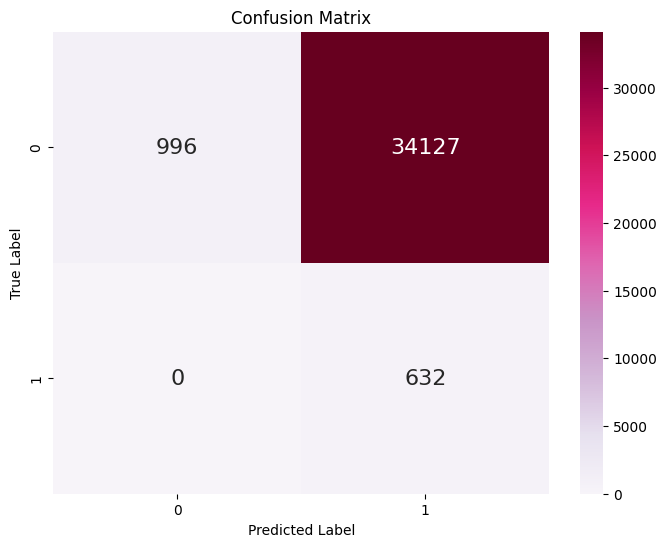

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Conectar a la base de datos desde Google Colab
project_id = "riesgo-relativo-406716"
query = "SELECT * FROM Pruebas.score_crediticio"
df = pd.read_gbq(query, project_id=project_id)
# Supongamos que 'default_flag' es tu etiqueta real
y_real = df['default_flag']
# Supongamos que 'dummy_score' es tu etiqueta predicha
y_pred = df[['score']]
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_real, y_pred.any(axis=1))
# Mostrar la matriz de confusión como DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(conf_matrix_df)
# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Precisión: 0.27463863337713534
Sensibilidad: 0.33069620253164556
Especificidad: 0.9727310865613201
F1-Score: 0.3000717875089734
          Predicted 0  Predicted 1
Actual 0        34571          552
Actual 1          423          209


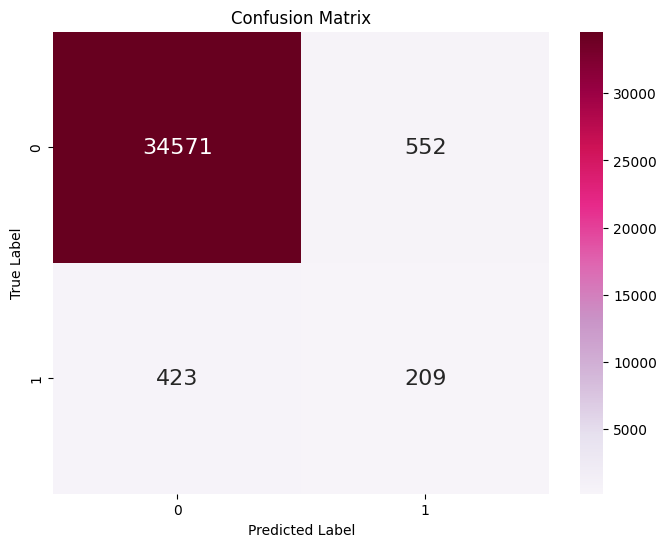

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Conectar a la base de datos desde Google Colab
project_id = "riesgo-relativo-406716"
query = "SELECT * FROM Pruebas.score_crediticio"
df = pd.read_gbq(query, project_id=project_id)

# Supongamos que 'default_flag' es tu etiqueta real
y_real = df['default_flag']

# Supongamos que 'dummy_score' es tu etiqueta predicha
y_pred = df[['dummy_score']]

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_real, y_pred.any(axis=1))

# Calcular métricas
precision = precision_score(y_real, y_pred)
recall = recall_score(y_real, y_pred)
accuracy = accuracy_score(y_real, y_pred)
f1 = f1_score(y_real, y_pred)

# Mostrar métricas
print(f'Precisión: {precision}')
print(f'Sensibilidad: {recall}')
print(f'Especificidad: {accuracy}')
print(f'F1-Score: {f1}')

# Mostrar la matriz de confusión como DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(conf_matrix_df)

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


27 QUE ERAN MALOS PERO PUSIMOS BUENOS
605 MALOS PAGADORES
5669 BUENOS QUE PUSIMOS MALOS
29454 BUENOS QUE PUSIMOS BUENOS

# **Precisión (Precision):**

De todos los usuarios que nuestro modelo predijo como "malos pagadores" (clase 1), **solo el 9.64% realmente resultaron ser "malos pagadores"**. La precisión es baja, lo que indica que **el modelo está haciendo muchos falsos positivos**, es decir, está prediciendo incorrectamente a usuarios como "malos pagadores".

# **Sensibilidad (Recall):**
De todos los usuarios que realmente son "malos pagadores" (clase 1), **el 95.73% fueron correctamente identificados por el modelo. La sensibilidad es alta**, lo que significa que el modelo es efectivo para encontrar a los **"malos pagadores".**

# **Especificidad:**
De todos los usuarios que son realmente "buenos pagadores" (clase 0), el 84.07% fueron correctamente identificados como tales por el modelo. **La especificidad es moderada**, indicando que **el modelo también es razonablemente bueno para identificar a los "buenos pagadores".**

# **F1-Score:**
El F1-Score es una medida combinada que equilibra precisión y sensibilidad.
En este caso, **el F1-Score es 17.52%, lo que sugiere un equilibrio moderado entre la capacidad del modelo para identificar a los "malos pagadores" y evitar falsas alarmas.**

**EN RESUMEN**
el modelo tiene un rendimiento destacado al identificar a los "malos pagadores" (alta sensibilidad), pero a costa de una baja precisión , ya que también clasifica erróneamente a algunos "buenos pagadores" como "malos pagadores".
Dependiendo de tus objetivos y de las consecuencias de los errores de clasificación, podrías considerar ajustar el umbral de decisión del modelo o explorar otras técnicas para mejorar su rendimiento.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
project_id = "riesgo-relativo-406716"
query = "SELECT * FROM Pruebas.tabla_general"
df = pd.read_gbq(query, project_id=project_id)

In [ ]:
df.head(3)

,user_id,age,sex,last_month_salary_limpio,number_dependents_limpio,default_flag,using_lines_not_secured_personal_assets_limpio,more_90_days_overdue,number_times_delayed_payment_loan_30_59_days,debt_ratio_limpio,...,cuartil_total_loans,dummy_total_loans,riesgo_total_loan,cuartil_last_month_salary,dummy_last_month_salary,riesgo_last_month_salary,cuartil_number_dependet,dummy_number_dependent,riesgo_number_depende,new_default_flag
0,1,55,F,2200.0,0,0,0.667083,0,0,0.153112,...,1,1,mayor riesgo de ser mal pagador,1,1,mayor riesgo de ser mal pagador,2,0,menor riesgo de ser mal pagador,0
1,2,44,M,7499.0,0,0,0.007093,0,0,0.148800,...,4,0,menor riesgo de ser mal pagador,4,0,menor riesgo de ser mal pagador,2,0,menor riesgo de ser mal pagador,0
2,3,54,M,5900.0,0,0,0.091213,0,0,0.351635,...,4,0,menor riesgo de ser mal pagador,3,0,menor riesgo de ser mal pagador,2,0,menor riesgo de ser mal pagador,0


In [ ]:
df[['age','default_flag']].head()

,age,default_flag
0,55,0
1,44,0
2,54,0
3,54,0
4,42,0


<Axes: xlabel='age', ylabel='default_flag'>

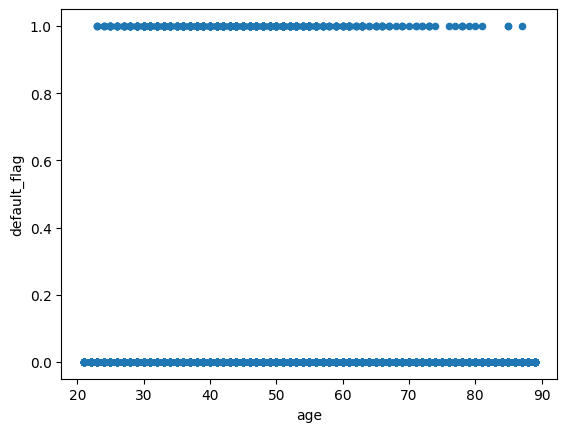

In [ ]:
df[['age','default_flag']].plot.scatter(x='age',y='default_flag')

In [ ]:
# pruebas de parametro
w = 0.09
b = -3,6

In [ ]:
# puntos de la recta
x = np.linspace(0,df['age'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
df.plot.scatter(x='age',y='default_flag')
plt.plot(x, y, '-r')
plt.ylim(0,df['default_flag'].max()*1.1)
# plt.grid()
plt.show()

ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.cloud import bigquery
# Especifica tu proyecto y la tabla de BigQuery
project_id = "riesgo-relativo-406716"
table_id = 'Pruebas.tabla_general'
# Consulta BigQuery y carga los datos en un DataFrame de Pandas
client = bigquery.Client(project=project_id)
query = f'SELECT * FROM `{project_id}.{table_id}`'
df = client.query(query).to_dataframe()
# Separar las características (X) y la variable dependiente (y)
X = df[['age', 'last_month_salary_limpio','using_lines_not_secured_personal_assets_limpio','more_90_days_overdue','number_times_delayed_payment_loan_30_59_days','debt_ratio_limpio','loan_other','loan_real_state','total_loans','number_dependents_limpio']]
y = df['default_flag']
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Estandarizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Crear el modelo de regresión logística
#model = LogisticRegression()
# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
# Entrenar el modelo
model.fit(X_train, y_train)
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Imprimir resultados
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9897916375332121
Confusion Matrix:
[[7001   19]
 [  54   77]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      7020
         1.0       0.80      0.59      0.68       131

    accuracy                           0.99      7151
   macro avg       0.90      0.79      0.84      7151
weighted avg       0.99      0.99      0.99      7151



In [ ]:
pip install seaborn matplotlib

Exactitud: 0.9897916375332121
Informe de clasificación:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      7020
         1.0       0.80      0.59      0.68       131

    accuracy                           0.99      7151
   macro avg       0.90      0.79      0.84      7151
weighted avg       0.99      0.99      0.99      7151

          Predicted 0  Predicted 1
Actual 0         7001           19
Actual 1           54           77


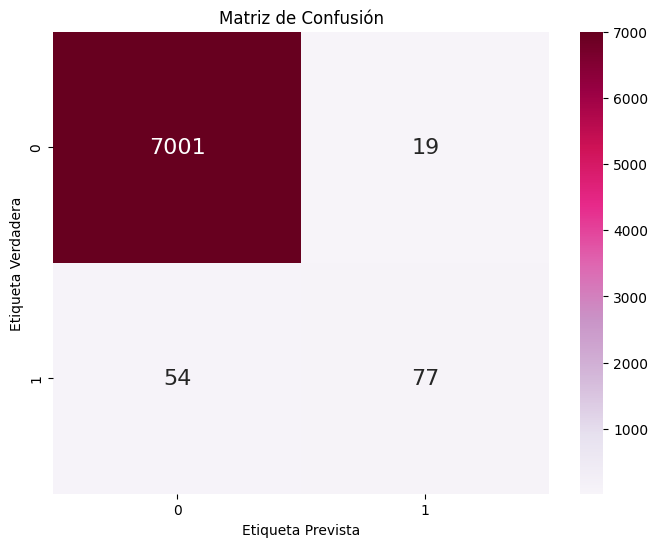

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'default_flag' es tu etiqueta real
y_real = y_test  # Utilizamos y_test del conjunto de prueba

# Supongamos que 'y_pred' es tu etiqueta predicha
# Usamos y_pred obtenido de tu modelo LogisticRegression
y_pred = model.predict(X_test)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_real, y_pred)

# Calcular métricas
accuracy = accuracy_score(y_real, y_pred)
classification_rep = classification_report(y_real, y_pred)

# Mostrar métricas
print(f'Exactitud: {accuracy}')
print(f'Informe de clasificación:\n{classification_rep}')

# Mostrar la matriz de confusión como DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(conf_matrix_df)

# Visualizar la matriz de confusión como un mapa de calor con seaborn

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', annot_kws={"size": 16})
plt.xlabel('Etiqueta Prevista')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

Exactitud: 0.9897916375332121
Informe de clasificación:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      7020
         1.0       0.80      0.59      0.68       131

    accuracy                           0.99      7151
   macro avg       0.90      0.79      0.84      7151
weighted avg       0.99      0.99      0.99      7151



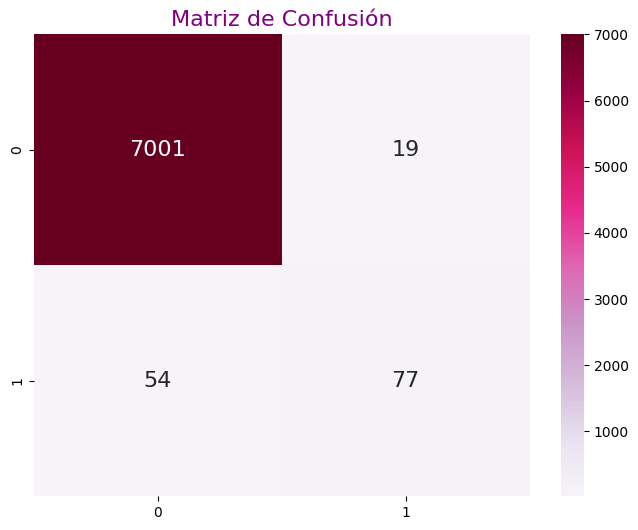

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que 'default_flag' es tu etiqueta real
y_real = y_test  # Utilizamos y_test del conjunto de prueba

# Supongamos que 'y_pred' es tu etiqueta predicha
# Usamos y_pred obtenido de tu modelo LogisticRegression
y_pred = model.predict(X_test)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_real, y_pred)

# Calcular métricas
accuracy = accuracy_score(y_real, y_pred)
classification_rep = classification_report(y_real, y_pred)

# Mostrar métricas
print(f'Exactitud: {accuracy}')
print(f'Informe de clasificación:\n{classification_rep}')

# Visualizar la matriz de confusión como un mapa de calor con seaborn
plt.figure(figsize=(8, 6))

# Personalizar ejes y colores
plt.xlabel('Predicción del Modelo', fontsize=25, color='purple')
plt.ylabel('Valor Real', fontsize=14, color='purple')
plt.title('Matriz de Confusión', fontsize=16, color='purple')

# Crear la gráfica de calor y obtener el objeto mappable
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', annot_kws={"size": 16})

# Personalizar los colores de la barra de colores (barra lateral)
#cbar = heatmap.figure.colorbar(heatmap.collections[0])
cbar.set_label('Frecuencia', rotation=270, labelpad=15)

plt.show()

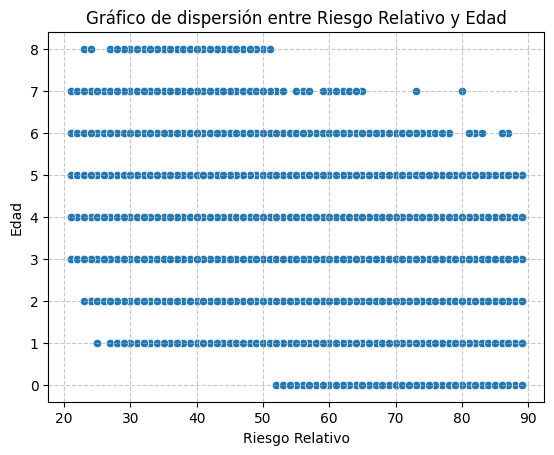

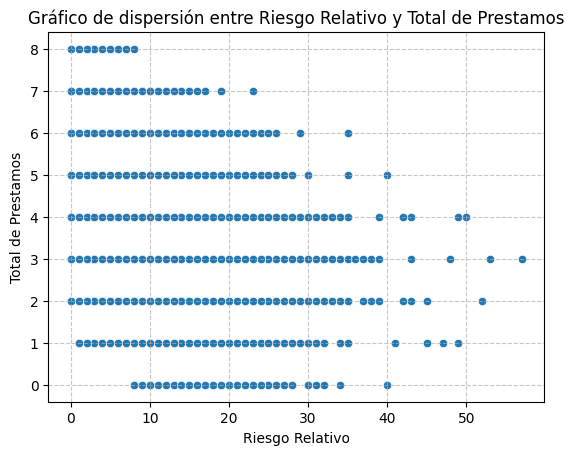

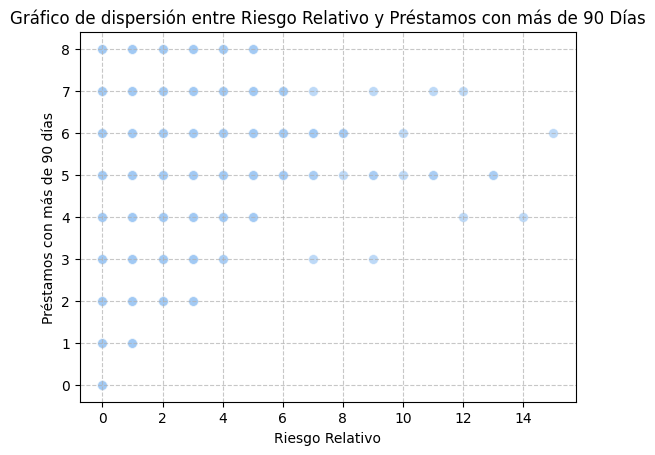

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir colores personalizados
color_palette = sns.color_palette("pastel")  # Puedes elegir otro conjunto de colores

# Crear el gráfico de dispersión con personalizaciones
sns.scatterplot(x='age', y='score', data=df)

# Personalizar título y ejes
plt.title('Gráfico de dispersión entre Riesgo Relativo y Edad')
plt.xlabel('Riesgo Relativo')
plt.ylabel('Edad')
# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()
plt.subplots_adjust(hspace=2)

#2DO GRAFICO
# Definir colores personalizados
color_palette = sns.color_palette("pastel")  # Puedes elegir otro conjunto de colores

# Crear el gráfico de dispersión con personalizaciones
sns.scatterplot(x='total_loans', y='score', data=df)

# Personalizar título y ejes
plt.title('Gráfico de dispersión entre Riesgo Relativo y Total de Prestamos')
plt.xlabel('Riesgo Relativo')
plt.ylabel('Total de Prestamos')
# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()
plt.subplots_adjust(hspace=2)

#3ER GRAFICO

# Definir colores personalizados
color_palette = sns.color_palette("pastel")  # Puedes elegir otro conjunto de colores

# Crear el gráfico de dispersión con personalizaciones
sns.scatterplot(x='more_90_days_overdue', y='score', data=df, color=color_palette[0], alpha=0.7, s=50)

# Personalizar título y ejes
plt.title('Gráfico de dispersión entre Riesgo Relativo y Préstamos con más de 90 Días')
plt.xlabel('Riesgo Relativo')
plt.ylabel('Préstamos con más de 90 días')

# Agregar cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

# Matriz de dispersión (pair plot) para ver las relaciones bivariadas entre varias variables
#sns.pairplot(df[['score', 'age', 'last_month_salary_limpio','debt_ratio_limpio']])
#plt.suptitle('Matriz de Dispersión entre Variables', y=1.02)
#plt.show()
